# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing Data

**Training dataset**

In [3]:
train_df = pd.read_csv("Train_set_OHEencoded.csv")
train_df.drop(labels="Unnamed: 0", axis=1, inplace=True)    

In [4]:
train_df

,Duration,Total_Stops,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,...,1 Long layover,1 Short layover,2 Long layover,Business class,Change airports,In-flight meal not included,No Info,No check-in baggage included,No info,Red-eye flight
0,170,0.0,3897.0,24,3,2019,1,10,22,20,...,0,0,0,0,0,0,0,0,1,0
1,445,2.0,7662.0,1,5,2019,13,15,5,50,...,0,0,0,0,0,0,0,0,1,0
2,1140,2.0,13882.0,9,6,2019,4,25,9,25,...,0,0,0,0,0,0,0,0,1,0
3,325,1.0,6218.0,12,5,2019,23,30,18,5,...,0,0,0,0,0,0,0,0,1,0
4,285,1.0,13302.0,1,3,2019,21,35,16,50,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10676,150,0.0,4107.0,9,4,2019,22,25,19,55,...,0,0,0,0,0,0,0,0,1,0
10677,155,0.0,4145.0,27,4,2019,23,20,20,45,...,0,0,0,0,0,0,0,0,1,0
10678,180,0.0,7229.0,27,4,2019,11,20,8,20,...,0,0,0,0,0,0,0,0,1,0
10679,160,0.0,12648.0,1,3,2019,14,10,11,30,...,0,0,0,0,0,0,0,0,1,0


**Test dataset**

In [5]:
test_df = pd.read_csv("Test_set_OHEencoded.csv")
test_df.drop(labels="Unnamed: 0", axis=1, inplace=True)

In [6]:
test_df

,Duration,Total_Stops,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Air Asia,...,1 Long layover,1 Short layover,2 Long layover,Business class,Change airports,In-flight meal not included,No Info,No check-in baggage included,No info,Red-eye flight
0,655,1.0,6,6,2019,4,25,17,30,0,...,0,0,0,0,0,0,0,0,1,0
1,240,1.0,12,5,2019,10,20,6,20,0,...,0,0,0,0,0,0,0,0,1,0
2,1425,1.0,21,5,2019,19,0,19,15,0,...,0,0,0,0,0,1,0,0,0,0
3,780,1.0,21,5,2019,21,0,8,0,0,...,0,0,0,0,0,0,0,0,1,0
4,170,0.0,24,6,2019,2,45,23,55,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2665,1435,1.0,6,6,2019,20,25,20,30,0,...,0,0,0,0,0,0,0,0,1,0
2666,155,0.0,27,3,2019,16,55,14,20,0,...,0,0,0,0,0,0,0,0,1,0
2667,395,1.0,6,3,2019,4,25,21,50,0,...,0,0,0,0,0,0,0,0,1,0
2668,915,1.0,6,3,2019,19,15,4,0,0,...,0,0,0,0,0,0,0,0,1,0


# Data seperation as X and y


In [7]:
y = train_df["Price"]
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10676     4107.0
10677     4145.0
10678     7229.0
10679    12648.0
10680    11753.0
Name: Price, Length: 10681, dtype: float64

In [8]:
X = train_df.drop(labels="Price", axis=1)
X

,Duration,Total_Stops,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Air Asia,...,1 Long layover,1 Short layover,2 Long layover,Business class,Change airports,In-flight meal not included,No Info,No check-in baggage included,No info,Red-eye flight
0,170,0.0,24,3,2019,1,10,22,20,0,...,0,0,0,0,0,0,0,0,1,0
1,445,2.0,1,5,2019,13,15,5,50,0,...,0,0,0,0,0,0,0,0,1,0
2,1140,2.0,9,6,2019,4,25,9,25,0,...,0,0,0,0,0,0,0,0,1,0
3,325,1.0,12,5,2019,23,30,18,5,0,...,0,0,0,0,0,0,0,0,1,0
4,285,1.0,1,3,2019,21,35,16,50,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10676,150,0.0,9,4,2019,22,25,19,55,1,...,0,0,0,0,0,0,0,0,1,0
10677,155,0.0,27,4,2019,23,20,20,45,0,...,0,0,0,0,0,0,0,0,1,0
10678,180,0.0,27,4,2019,11,20,8,20,0,...,0,0,0,0,0,0,0,0,1,0
10679,160,0.0,1,3,2019,14,10,11,30,0,...,0,0,0,0,0,0,0,0,1,0


In [9]:
X_test = test_df
X_test

,Duration,Total_Stops,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Air Asia,...,1 Long layover,1 Short layover,2 Long layover,Business class,Change airports,In-flight meal not included,No Info,No check-in baggage included,No info,Red-eye flight
0,655,1.0,6,6,2019,4,25,17,30,0,...,0,0,0,0,0,0,0,0,1,0
1,240,1.0,12,5,2019,10,20,6,20,0,...,0,0,0,0,0,0,0,0,1,0
2,1425,1.0,21,5,2019,19,0,19,15,0,...,0,0,0,0,0,1,0,0,0,0
3,780,1.0,21,5,2019,21,0,8,0,0,...,0,0,0,0,0,0,0,0,1,0
4,170,0.0,24,6,2019,2,45,23,55,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2665,1435,1.0,6,6,2019,20,25,20,30,0,...,0,0,0,0,0,0,0,0,1,0
2666,155,0.0,27,3,2019,16,55,14,20,0,...,0,0,0,0,0,0,0,0,1,0
2667,395,1.0,6,3,2019,4,25,21,50,0,...,0,0,0,0,0,0,0,0,1,0
2668,915,1.0,6,3,2019,19,15,4,0,0,...,0,0,0,0,0,0,0,0,1,0


# Data Splitting

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.25, random_state=0)

In [11]:
X_train

,Duration,Total_Stops,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Air Asia,...,1 Long layover,1 Short layover,2 Long layover,Business class,Change airports,In-flight meal not included,No Info,No check-in baggage included,No info,Red-eye flight
5078,1430,1.0,15,5,2019,16,20,16,30,0,...,0,0,0,0,0,1,0,0,0,0
1755,185,0.0,18,6,2019,22,0,18,55,0,...,0,0,0,0,0,0,0,0,1,0
756,925,1.0,18,5,2019,19,15,3,50,0,...,0,0,0,0,0,0,0,0,1,0
3671,1430,1.0,1,4,2019,19,50,20,0,0,...,0,0,0,0,0,0,0,0,1,0
8487,215,1.0,18,5,2019,23,30,19,55,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,505,2.0,18,5,2019,4,25,20,0,0,...,0,0,0,0,0,0,0,0,1,0
4859,665,1.0,27,5,2019,16,10,5,5,0,...,0,0,0,0,0,0,0,0,1,0
3264,1325,2.0,27,3,2019,4,25,6,20,0,...,0,0,0,0,0,1,0,0,0,0
9845,140,0.0,15,5,2019,0,25,22,5,0,...,0,0,0,0,0,0,0,0,1,0


In [12]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_cv = X_cv.reset_index(drop=True)
y_cv = y_cv.reset_index(drop=True)

# Data Cleaning

**Cleaning null values**

In [13]:
X_train.isnull().sum()

Duration                             0
Total_Stops                          1
Date                                 0
Month                                0
Year                                 0
Arrival_Hour                         0
Arrival_Minute                       0
Dep_Hour                             0
Dep_Minute                           0
Air Asia                             0
Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways                          0
Jet Airways Business                 0
Multiple carriers                    0
Multiple carriers Premium economy    0
SpiceJet                             0
Trujet                               0
Vistara                              0
Vistara Premium economy              0
Banglore                             0
Chennai                              0
Delhi                                0
Kolkata                              0
Mumbai                   

In [14]:
X_train.index[X_train["Total_Stops"].isnull() == True]

Int64Index([7470], dtype='int64')

In [15]:
X_train.loc[7468:7472]

,Duration,Total_Stops,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Air Asia,...,1 Long layover,1 Short layover,2 Long layover,Business class,Change airports,In-flight meal not included,No Info,No check-in baggage included,No info,Red-eye flight
7468,155,0.0,24,6,2019,0,50,22,15,0,...,0,0,0,0,0,0,0,0,1,0
7469,1345,2.0,9,6,2019,5,25,7,0,0,...,0,0,0,0,0,0,0,0,1,0
7470,1420,NaN,6,5,2019,9,25,9,45,0,...,0,0,0,0,0,0,0,0,1,0
7471,535,1.0,21,3,2019,19,15,10,20,0,...,0,0,0,0,0,0,0,0,1,0
7472,740,1.0,15,5,2019,20,45,8,25,0,...,0,0,0,0,0,0,0,0,1,0


In [16]:
y_train.loc[7468:7472]

7468     4804.0
7469    12744.0
7470     7480.0
7471     7531.0
7472    14781.0
Name: Price, dtype: float64

In [17]:
X_train.drop(index=7470, axis=0, inplace=True)
X_train = X_train.reset_index(drop=True)
y_train.drop(index=7470, axis=0, inplace=True)
y_train = y_train.reset_index(drop=True)

In [18]:
X_train.loc[7468:7472]

,Duration,Total_Stops,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Air Asia,...,1 Long layover,1 Short layover,2 Long layover,Business class,Change airports,In-flight meal not included,No Info,No check-in baggage included,No info,Red-eye flight
7468,155,0.0,24,6,2019,0,50,22,15,0,...,0,0,0,0,0,0,0,0,1,0
7469,1345,2.0,9,6,2019,5,25,7,0,0,...,0,0,0,0,0,0,0,0,1,0
7470,535,1.0,21,3,2019,19,15,10,20,0,...,0,0,0,0,0,0,0,0,1,0
7471,740,1.0,15,5,2019,20,45,8,25,0,...,0,0,0,0,0,0,0,0,1,0
7472,1535,1.0,6,3,2019,6,50,5,15,0,...,0,0,0,0,0,0,0,0,1,0


In [19]:
y_train.loc[7468:7472]

7468     4804.0
7469    12744.0
7470     7531.0
7471    14781.0
7472    11522.0
Name: Price, dtype: float64

In [20]:
X_cv.isnull().sum()

Duration                             0
Total_Stops                          0
Date                                 0
Month                                0
Year                                 0
Arrival_Hour                         0
Arrival_Minute                       0
Dep_Hour                             0
Dep_Minute                           0
Air Asia                             0
Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways                          0
Jet Airways Business                 0
Multiple carriers                    0
Multiple carriers Premium economy    0
SpiceJet                             0
Trujet                               0
Vistara                              0
Vistara Premium economy              0
Banglore                             0
Chennai                              0
Delhi                                0
Kolkata                              0
Mumbai                   

In [21]:
y_cv.isnull().sum()

0

**Cleaning repettitive columns** 

In [22]:
X_train.columns

Index(['Duration', 'Total_Stops', 'Date', 'Month', 'Year', 'Arrival_Hour',
       'Arrival_Minute', 'Dep_Hour', 'Dep_Minute', 'Air Asia', 'Air India',
       'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Banglore', 'Chennai',
       'Delhi', 'Kolkata', 'Mumbai', 'Banglore.1', 'Cochin', 'Delhi.1',
       'Hyderabad', 'Kolkata.1', 'New Delhi', '1 Long layover',
       '1 Short layover', '2 Long layover', 'Business class',
       'Change airports', 'In-flight meal not included', 'No Info',
       'No check-in baggage included', 'No info', 'Red-eye flight'],
      dtype='object')

In [23]:
X_train["No Info"] = X_train["No Info"] + X_train["No info"] 
X_train.drop(labels="No info", axis=1, inplace=True)

In [24]:
X_train.columns

Index(['Duration', 'Total_Stops', 'Date', 'Month', 'Year', 'Arrival_Hour',
       'Arrival_Minute', 'Dep_Hour', 'Dep_Minute', 'Air Asia', 'Air India',
       'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Banglore', 'Chennai',
       'Delhi', 'Kolkata', 'Mumbai', 'Banglore.1', 'Cochin', 'Delhi.1',
       'Hyderabad', 'Kolkata.1', 'New Delhi', '1 Long layover',
       '1 Short layover', '2 Long layover', 'Business class',
       'Change airports', 'In-flight meal not included', 'No Info',
       'No check-in baggage included', 'Red-eye flight'],
      dtype='object')

In [25]:
X_cv.columns

Index(['Duration', 'Total_Stops', 'Date', 'Month', 'Year', 'Arrival_Hour',
       'Arrival_Minute', 'Dep_Hour', 'Dep_Minute', 'Air Asia', 'Air India',
       'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Banglore', 'Chennai',
       'Delhi', 'Kolkata', 'Mumbai', 'Banglore.1', 'Cochin', 'Delhi.1',
       'Hyderabad', 'Kolkata.1', 'New Delhi', '1 Long layover',
       '1 Short layover', '2 Long layover', 'Business class',
       'Change airports', 'In-flight meal not included', 'No Info',
       'No check-in baggage included', 'No info', 'Red-eye flight'],
      dtype='object')

In [26]:
X_cv["No Info"] = X_cv["No Info"] + X_cv["No info"] 
X_cv.drop(labels="No info", axis=1, inplace=True)
X_cv.columns

Index(['Duration', 'Total_Stops', 'Date', 'Month', 'Year', 'Arrival_Hour',
       'Arrival_Minute', 'Dep_Hour', 'Dep_Minute', 'Air Asia', 'Air India',
       'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Banglore', 'Chennai',
       'Delhi', 'Kolkata', 'Mumbai', 'Banglore.1', 'Cochin', 'Delhi.1',
       'Hyderabad', 'Kolkata.1', 'New Delhi', '1 Long layover',
       '1 Short layover', '2 Long layover', 'Business class',
       'Change airports', 'In-flight meal not included', 'No Info',
       'No check-in baggage included', 'Red-eye flight'],
      dtype='object')

In [27]:
X_test["No Info"] = X_test["No Info"] + X_test["No info"] 
X_test.drop(labels="No info", axis=1, inplace=True)
X_test.columns

Index(['Duration', 'Total_Stops', 'Date', 'Month', 'Year', 'Arrival_Hour',
       'Arrival_Minute', 'Dep_Hour', 'Dep_Minute', 'Air Asia', 'Air India',
       'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Banglore', 'Chennai',
       'Delhi', 'Kolkata', 'Mumbai', 'Banglore.1', 'Cochin', 'Delhi.1',
       'Hyderabad', 'Kolkata.1', 'New Delhi', '1 Long layover',
       '1 Short layover', '2 Long layover', 'Business class',
       'Change airports', 'In-flight meal not included', 'No Info',
       'No check-in baggage included', 'Red-eye flight'],
      dtype='object')

# Model Building

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor 


## Linear Regression

In [29]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [30]:
lr_train_pred = lr.predict(X_train)
lr_cv_pred = lr.predict(X_cv)

## Polynomial Regression

In [31]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_cv_poly = poly.fit_transform(X_cv)

In [32]:
X_train_poly.shape

(8009, 903)

In [33]:
mr = LinearRegression()
mr.fit(X_train_poly, y_train)

LinearRegression()

In [34]:
mr_train_pred = mr.predict(X_train_poly)
mr_cv_pred = mr.predict(X_cv_poly)

## Decision Tree

In [35]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [36]:
dtr_train_pred = dtr.predict(X_train)
dtr_cv_pred = dtr.predict(X_cv)

## Random forest Regressor

In [37]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [38]:
rfr_train_pred = rfr.predict(X_train)
rfr_cv_pred = rfr.predict(X_cv)

## XGBoost

In [39]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [40]:
xgb_train_pred = xgb.predict(X_train)
xgb_cv_pred = xgb.predict(X_cv)

# Evaluation of all Models

In [41]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score


**Linear regression**

In [42]:
lr_train_mse = mean_squared_error(y_true=y_train, y_pred=lr_train_pred)
lr_train_mae = mean_absolute_error(y_true=y_train, y_pred=lr_train_pred)
lr_train_r2 = r2_score(y_true=y_train, y_pred=lr_train_pred)

lr_cv_mse = mean_squared_error(y_true=y_cv, y_pred=lr_cv_pred)
lr_cv_mae = mean_absolute_error(y_true=y_cv, y_pred=lr_cv_pred)
lr_cv_r2 = r2_score(y_true=y_cv, y_pred=lr_cv_pred)

lr_results = pd.DataFrame(["LinearRegressor", lr_train_mse, lr_train_mae, lr_train_r2, lr_cv_mse, lr_cv_mae, lr_cv_r2]).transpose()
lr_results.columns = ["Model", "Training MSE", "Training MAE", "Training r2", "cv MSE", "cv MAE", "cv r2",]
lr_results

,Model,Training MSE,Training MAE,Training r2,cv MSE,cv MAE,cv r2
0,LinearRegressor,6044852.372,1713.72065,0.706118,8129840.759763,1898.952212,0.650695


**Polynomial regression**

In [43]:
mr_train_mse = mean_squared_error(y_true=y_train, y_pred=mr_train_pred)
mr_train_mae = mean_absolute_error(y_true=y_train, y_pred=mr_train_pred)
mr_train_r2 = r2_score(y_true=y_train, y_pred=mr_train_pred)

mr_cv_mse = mean_squared_error(y_true=y_cv, y_pred=mr_cv_pred)
mr_cv_mae = mean_absolute_error(y_true=y_cv, y_pred=mr_cv_pred)
mr_cv_r2 = r2_score(y_true=y_cv, y_pred=mr_cv_pred)

mr_results = pd.DataFrame(["PolynomialRegressor", mr_train_mse, mr_train_mae, mr_train_r2, mr_cv_mse, mr_cv_mae, mr_cv_r2]).transpose()
mr_results.columns = ["Model", "Training MSE", "Training MAE", "Training r2", "cv MSE", "cv MAE", "cv r2",]
mr_results

,Model,Training MSE,Training MAE,Training r2,cv MSE,cv MAE,cv r2
0,PolynomialRegressor,3866652.066406,1321.578411,0.812015,7710200262.861845,4660.572582,-330.274785


**Decision tree**

In [44]:
dtr_train_mse = mean_squared_error(y_true=y_train, y_pred=dtr_train_pred)
dtr_train_mae = mean_absolute_error(y_true=y_train, y_pred=dtr_train_pred)
dtr_train_r2 = r2_score(y_true=y_train, y_pred=dtr_train_pred)

dtr_cv_mse = mean_squared_error(y_true=y_cv, y_pred=dtr_cv_pred)
dtr_cv_mae = mean_absolute_error(y_true=y_cv, y_pred=dtr_cv_pred)
dtr_cv_r2 = r2_score(y_true=y_cv, y_pred=dtr_cv_pred)

dtr_results = pd.DataFrame(["DecisionTree", dtr_train_mse, dtr_train_mae, dtr_train_r2, dtr_cv_mse, dtr_cv_mae, dtr_cv_r2]).transpose()
dtr_results.columns = ["Model", "Training MSE", "Training MAE", "Training r2", "cv MSE", "cv MAE", "cv r2",]
dtr_results

,Model,Training MSE,Training MAE,Training r2,cv MSE,cv MAE,cv r2
0,DecisionTree,62674.768381,30.928813,0.996953,4072230.365177,800.910645,0.825033


**Random Forest Regressor**

In [45]:
rfr_train_mse = mean_squared_error(y_true=y_train, y_pred=rfr_train_pred)
rfr_train_mae = mean_absolute_error(y_true=y_train, y_pred=rfr_train_pred)
rfr_train_r2 = r2_score(y_true=y_train, y_pred=rfr_train_pred)

rfr_cv_mse = mean_squared_error(y_true=y_cv, y_pred=rfr_cv_pred)
rfr_cv_mae = mean_absolute_error(y_true=y_cv, y_pred=rfr_cv_pred)
rfr_cv_r2 = r2_score(y_true=y_cv, y_pred=rfr_cv_pred)

rfr_results = pd.DataFrame(["RandomForestRegressor", rfr_train_mse, rfr_train_mae, rfr_train_r2, rfr_cv_mse, rfr_cv_mae, rfr_cv_r2]).transpose()
rfr_results.columns = ["Model", "Training MSE", "Training MAE", "Training r2", "cv MSE", "cv MAE", "cv r2",]
rfr_results

,Model,Training MSE,Training MAE,Training r2,cv MSE,cv MAE,cv r2
0,RandomForestRegressor,367803.456262,252.419713,0.982119,2928916.765141,727.729468,0.874157


**XGBoost Regressor**

In [46]:
xgb_train_mse = mean_squared_error(y_true=y_train, y_pred=xgb_train_pred)
xgb_train_mae = mean_absolute_error(y_true=y_train, y_pred=xgb_train_pred)
xgb_train_r2 = r2_score(y_true=y_train, y_pred=xgb_train_pred)

xgb_cv_mse = mean_squared_error(y_true=y_cv, y_pred=xgb_cv_pred)
xgb_cv_mae = mean_absolute_error(y_true=y_cv, y_pred=xgb_cv_pred)
xgb_cv_r2 = r2_score(y_true=y_cv, y_pred=xgb_cv_pred)

xgb_results = pd.DataFrame(["XGBoostRegressor", xgb_train_mse, xgb_train_mae, xgb_train_r2, xgb_cv_mse, xgb_cv_mae, xgb_cv_r2]).transpose()
xgb_results.columns = ["Model", "Training MSE", "Training MAE", "Training r2", "cv MSE", "cv MAE", "cv r2",]
xgb_results

,Model,Training MSE,Training MAE,Training r2,cv MSE,cv MAE,cv r2
0,XGBoostRegressor,613511.248489,491.471818,0.970173,2756379.916498,816.060492,0.88157


**Results**

In [47]:
results = pd.concat([lr_results, mr_results,dtr_results, rfr_results, xgb_results], axis=0)
results.reset_index(drop=True)

,Model,Training MSE,Training MAE,Training r2,cv MSE,cv MAE,cv r2
0,LinearRegressor,6044852.372,1713.72065,0.706118,8129840.759763,1898.952212,0.650695
1,PolynomialRegressor,3866652.066406,1321.578411,0.812015,7710200262.861845,4660.572582,-330.274785
2,DecisionTree,62674.768381,30.928813,0.996953,4072230.365177,800.910645,0.825033
3,RandomForestRegressor,367803.456262,252.419713,0.982119,2928916.765141,727.729468,0.874157
4,XGBoostRegressor,613511.248489,491.471818,0.970173,2756379.916498,816.060492,0.88157


In [48]:
y_cv.describe()

count     2671.000000
mean      9296.744291
std       4825.251472
min       1759.000000
25%       5228.000000
50%       8610.000000
75%      12663.000000
max      79512.000000
Name: Price, dtype: float64

It can be seen that MAE is less than Standard deviation for  all models except Polynomial regressor. The best models among all are RandomForestRegressor and XGBRegressor. XBGRegressor is slightly better than the other as it generalizes even better.

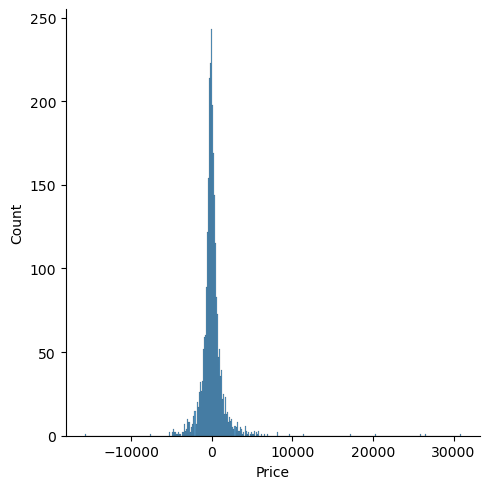

In [49]:
residuals = y_cv - xgb_cv_pred
sns.displot(residuals)

# Testing

In [50]:
xgb_test_pred = xgb.predict(X_test)
xgb_test_pred

array([14401.696,  4652.377, 12854.4  , ..., 16765.193, 14069.21 ,
        8056.59 ], dtype=float32)

In [51]:
predictions = pd.DataFrame(xgb_test_pred)
predictions.columns = ["Predicted price"]

In [52]:
predictions

,Predicted price
0,14401.696289
1,4652.376953
2,12854.400391
3,10158.035156
4,3742.487793
...,...
2665,10449.344727
2666,4602.737793
2667,16765.193359
2668,14069.209961


# Exporting Results

In [53]:
test_table = pd.read_excel("Test_set.xlsx")
final_output = pd.concat([test_table, predictions], axis=1)
final_output

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Predicted price
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,14401.696289
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,4652.376953
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,12854.400391
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,10158.035156
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,3742.487793
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,4602.737793
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,16765.193359
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,14069.209961
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,8056.589844


In [54]:
final_output.to_excel("Predictions.xlsx")
final_output.to_csv("Predictions.csv")